# Procesamiento en Python acerca del Dataframe 1: Actividad de clientes (actividad_clientes.csv)

In [64]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
from statistics import multimode, mean, median
import math

# Importar datos del archivo .csv

In [65]:
df = pd.read_csv("..\\dataset\\actividad_clientes.csv", index_col=0)
df.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount
rental_id,,,,,,,,,
76,2005-05-25 11:30:37,2005-06-03 12:00:37,mary,smith,nagasaki,35200,sasebo,japan,2.99
573,2005-05-28 10:35:23,2005-06-03 06:32:23,mary,smith,nagasaki,35200,sasebo,japan,0.99
1185,2005-06-15 00:54:12,2005-06-23 02:42:12,mary,smith,nagasaki,35200,sasebo,japan,5.99
1422,2005-06-15 18:02:53,2005-06-19 15:54:53,mary,smith,nagasaki,35200,sasebo,japan,0.99
1476,2005-06-15 21:08:46,2005-06-25 02:26:46,mary,smith,nagasaki,35200,sasebo,japan,9.99


# Vemos las propiedades de nuestra tabla

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15861 entries, 76 to 15725
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rental_date  15861 non-null  object 
 1   return_date  15861 non-null  object 
 2   first_name   15861 non-null  object 
 3   last_name    15861 non-null  object 
 4   district     15761 non-null  object 
 5   postal_code  15861 non-null  int64  
 6   city         15861 non-null  object 
 7   country      15861 non-null  object 
 8   amount       15861 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


# Vemos cauntos valores nulos tenemos

In [67]:
df.isna().sum()

rental_date      0
return_date      0
first_name       0
last_name        0
district       100
postal_code      0
city             0
country          0
amount           0
dtype: int64

# Creamos una copia y eliminamos los datos nulos

In [68]:
df_copy = df.copy()

In [69]:
df_copy = df_copy.dropna()

In [70]:
df_copy.isna().sum()

rental_date    0
return_date    0
first_name     0
last_name      0
district       0
postal_code    0
city           0
country        0
amount         0
dtype: int64

# Cambiar los tipos de datos de fecha

In [71]:
# Supongamos que tu DataFrame se llama df
df_copy['rental_date'] = pd.to_datetime(df_copy['rental_date']).dt.date
df_copy['return_date'] = pd.to_datetime(df_copy['return_date']).dt.date

# Ver el resultado
df_copy.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount
rental_id,,,,,,,,,
76,2005-05-25,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,2.99
573,2005-05-28,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,0.99
1185,2005-06-15,2005-06-23,mary,smith,nagasaki,35200,sasebo,japan,5.99
1422,2005-06-15,2005-06-19,mary,smith,nagasaki,35200,sasebo,japan,0.99
1476,2005-06-15,2005-06-25,mary,smith,nagasaki,35200,sasebo,japan,9.99


# Creación de columnas derivadas

## Creación columna "rental_days"

##### Esta columna representa el numero de dias que se ha alquilado la pelicula.

In [72]:
df_copy['rental_days'] = (pd.to_datetime(df_copy['return_date']) - pd.to_datetime(df_copy['rental_date'])).dt.days


## Creación columna "total_amount_cumsum"

##### Esta columna representa el acumulado que gasta cada cliente. Con cada alquiler de pelicula se va sumando a la cantidad total el importe de la pelicula alquilada

In [73]:
df_copy['total_amount_cumsum'] = df_copy.groupby(['first_name','last_name'])['amount'].cumsum()


## Creación columna "long_rental"

##### Columna creada para visualizar si un alquiler es de largo periodo (si es mayor que 6).

In [74]:
df_copy['long_rental'] = df_copy['rental_days'] > 6


In [75]:
df_copy.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount,rental_days,total_amount_cumsum,long_rental
rental_id,,,,,,,,,,,,
76,2005-05-25,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,2.99,9,2.99,True
573,2005-05-28,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,0.99,6,3.98,False
1185,2005-06-15,2005-06-23,mary,smith,nagasaki,35200,sasebo,japan,5.99,8,9.97,True
1422,2005-06-15,2005-06-19,mary,smith,nagasaki,35200,sasebo,japan,0.99,4,10.96,False
1476,2005-06-15,2005-06-25,mary,smith,nagasaki,35200,sasebo,japan,9.99,10,20.95,True


# Detectar outliers

# Columna "rental_days"

## Calculamos los límites y los percentiles

In [76]:
# Cálculo de límites
Q1 = df_copy['rental_days'].quantile(0.25)
Q3 = df_copy['rental_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Generamos el gráfico

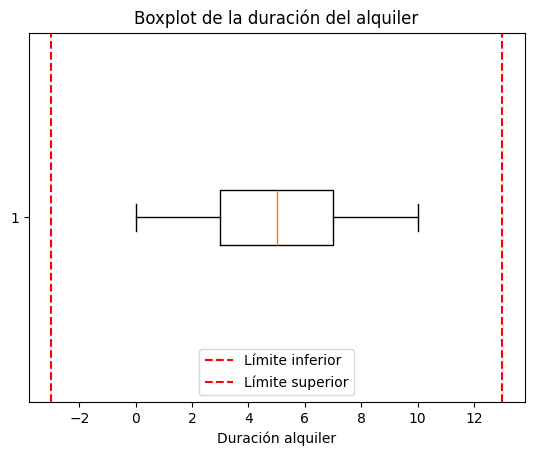

In [77]:
# Boxplot horizontal
plt.boxplot(df_copy['rental_days'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Duración alquiler")
plt.title("Boxplot de la duración del alquiler")
plt.legend()
plt.show()

##### No se encuentra ningún outlier, todo los datos se encuentran en rango, por lo que no existe ningún sesgo en los datos que puedan modificar su interpretación sobre ellos.

## Columna "amount"

In [78]:
# Cálculo de límites
Q1 = df_copy['amount'].quantile(0.25)
Q3 = df_copy['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

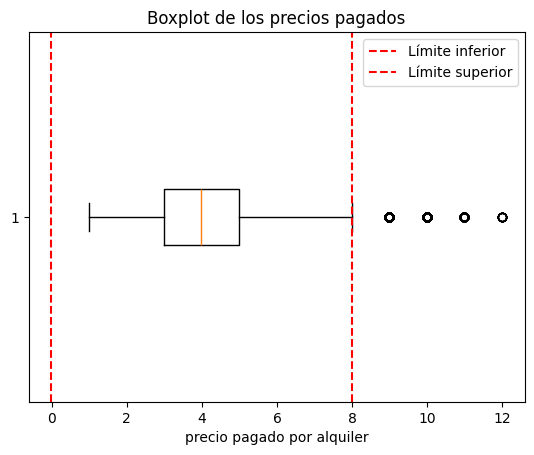

In [79]:
# Boxplot horizontal
plt.boxplot(df_copy['amount'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("precio pagado por alquiler")
plt.title("Boxplot de los precios pagados")
plt.legend()
plt.show()

##### Al analizar la columna amount encontramos la presencia de algunos outliers en nuestro dataset. Según los límites definidos:

##### Límite inferior: 0

##### Límite superior: 8

##### La mayoría de los datos se encuentran dentro de este rango, aunque se observa una ligera concentración de valores en el rango 5 a 8, cercano al límite superior. Esto indica que, aunque la mayoría de los alquileres tienen precios moderados, existen pagos relativamente altos que no son frecuentes.

##### Contexto sobre los outliers

##### Es importante tener en cuenta que el valor de amount no refleja únicamente el precio por día de alquiler, sino que también está influenciado por la duración del alquiler. Por lo tanto:

##### Alquilar por más días incrementa el amount total, lo que explica que algunos valores altos puedan considerarse outliers estadísticos pero no necesariamente inusuales desde un punto de vista del negocio.

##### En este sentido, los outliers detectados corresponden principalmente a alquileres de larga duración y representan situaciones plausibles y coherentes con el funcionamiento del sistema de alquileres.

##### Decisión sobre los outliers

##### Dado que los outliers no distorsionan significativamente la distribución general de los pagos y reflejan situaciones reales de negocio, se ha decidido mantenerlos en el análisis. Esto permite:

##### Conservar la integridad de los datos.

##### Reflejar con mayor fidelidad los patrones de gasto de los clientes.

##### Evitar sesgar el análisis eliminando casos que son simplemente menos frecuentes pero válidos.

##### Conclusión

##### Si bien existen valores inusuales en la columna amount, estos no representan errores ni anomalías significativas, sino casos de alquileres más largos. Por lo tanto, la inclusión de estos valores permitirá realizar análisis más completos y representativos del comportamiento real de los clientes.

In [80]:
df_max_amount = df_copy.groupby(['first_name','last_name'])['total_amount_cumsum'].max()


In [81]:
df_max_amount.head()

first_name  last_name
aaron       selby        110.76
adam        gooch        101.78
adrian      clary         71.82
agnes       bishop        98.77
alan        kahn         124.74
Name: total_amount_cumsum, dtype: float64

In [82]:
df_copy.groupby(['first_name', 'last_name']).ngroups


596

# Generación de datos analiticos (media, moda y mediana) y gráficos para cada uno de ellos

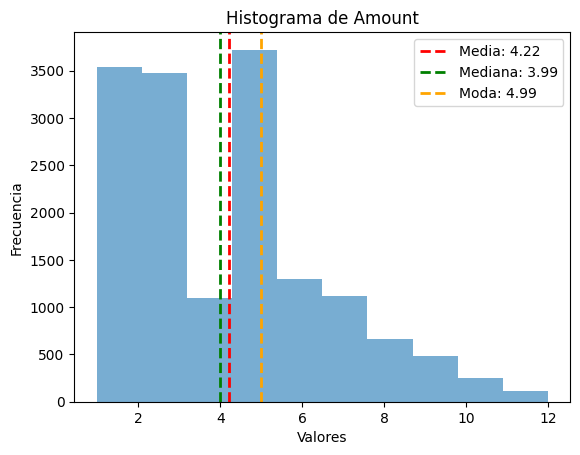

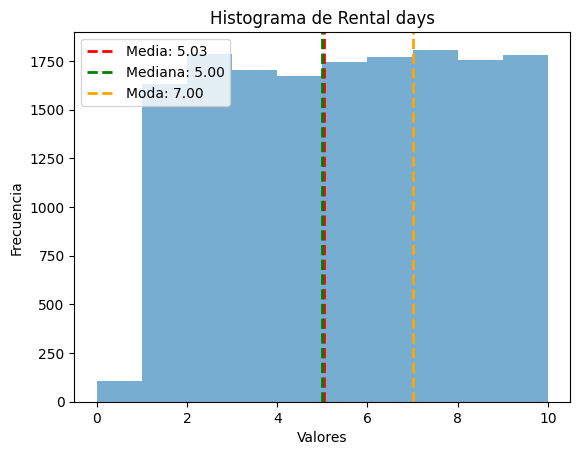

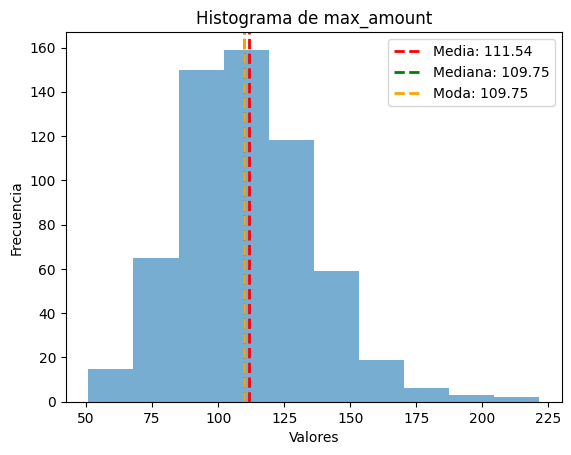

In [83]:
# Lista de columnas del dataframe
datasets = [
    df_copy['amount'], 
    df_copy['rental_days'], 
    pd.Series(df_max_amount.values)   # convertir el array en Serie
]
nombres = ['Amount', 'Rental days', 'max_amount']

for datos, nombre in zip(datasets, nombres):

    datos = datos.dropna()

    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode().iloc[0]

    plt.hist(datos, bins=10, alpha=0.6)

    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

    plt.title(f"Histograma de {nombre}")
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()
